In [1]:
import pickle
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [13, 10]

## Read in data

In [2]:
csv_file = "../data/BenthamTest/test.csv"
batch_size=16

# read in predictions
data = pickle.load(open("./tf_output/prediction/preds.pkl", "rb"))
labls, accs, losses, cers, preddicts = data
# read in csv
imfiles = pd.read_csv(csv_file, sep="\t")
# imfiles.new_img_path = [l.replace("Images_mod", "Images/Lines") for l in imfiles.new_img_path]

In [3]:
def getImg(ind):
    return Image.open(imfiles.new_img_path.iloc[ind])

def getLab1(ind):
    return imfiles.transcription.iloc[ind]
    
def getLab2(batch, b_ind):
    l1 = labls[batch]
    if len(l1) > 0:
        return l1[b_ind]
    else:
        return ""

def getPred(batch, b_ind):
    p1 = preddicts[batch]["words"]
    if len(p1) > 0:
        return p1[b_ind]
    else:
        return ""

def getIt(batch, b_ind):
    ind = batch*batch_size+b_ind
#     batch = ind // train_batch_size
#     b_ind = ind % train_batch_size
    
    img = getImg(ind)
    tran = getLab1(ind)
    lab = getLab2(batch, b_ind)
    pred = getPred(batch, b_ind)
    
    if lab == "" and pred == "" and tran != "":
        print("No prediction from machine")
        return "", "", ""
    else:
        return img, lab, pred
    
def showIt(batch, b_ind):
    img, lab, pred = getIt(batch, b_ind)
    print("Label:\t\t{0}\nPrediction:\t{1}".format(str(lab, "utf-8"), str(pred, "utf-8")))
    imshow(np.asarray(img), cmap="gray")

# Examples of transcriptions

In [11]:
i = 2
for j in range(16):
    print("Label:\t{0}\nPred:\t{1}\n".format(labls[i][j], preddicts[i]["words"][j]))

Label:	b'Rashness consists in the supposing a circumstance'
Pred:	b'Rashness consists in the supposing a circumstance'

Label:	b'which , had it existed , would have been material to'
Pred:	b'which , had it uxisted , would have been material to-'

Label:	b'exist where there were no good or probable grounds'
Pred:	b'cxist , where there were no good or probable grounds'

Label:	b'for supposing it to exist entertaining such a supposition .'
Pred:	b'for supfosigigsttocist  cnterlaining uch a upposition'

Label:	b'Main-Text'
Pred:	b'Nain -Teay .'

Label:	b'p'
Pred:	b'p'

Label:	b'In either case , the Mis-sup osal may have respect'
Pred:	b'In either case , the Mis-suposal may have respect'

Label:	b' ( A ) '
Pred:	b' A )'

Label:	b'either to the matter of fact or the matter of Law . It res='
Pred:	b'either to the matter of fact or the matter of daws . Ares e '

Label:	b' : pects the matter of fact when the mistake is concerning'
Pred:	b' : pects the matter of fact when the mistake is concenn 

Label:		for supposing it to exist entertaining such a supposition .
Prediction:	for supfosigigsttocist  cnterlaining uch a upposition


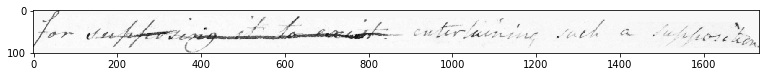

In [14]:
showIt(2, 3)

# Successes

Label:		182
Prediction:	182


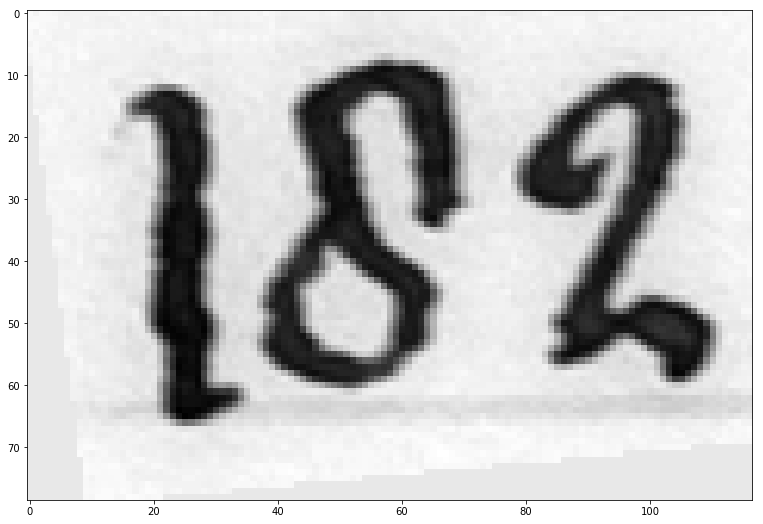

In [6]:
showIt(0, 13)

# Slightly off

Label:		income in driblets day by day during the course of the same 
Prediction:	iintome in obrcblets day by day during the comrse of the csme 


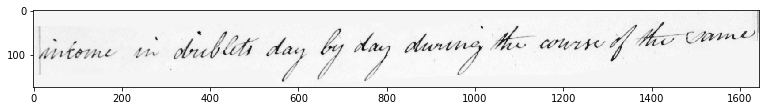

In [7]:
showIt(0,2)

Label:		amounts there will be twice as much to dispose of in any such 
Prediction:	 amounts thore will be twice as much to dispose of in amy ouch 


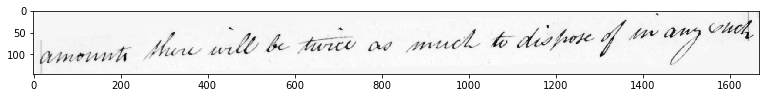

In [8]:
showIt(0,3)

Label:		may 
Prediction:	Mey 


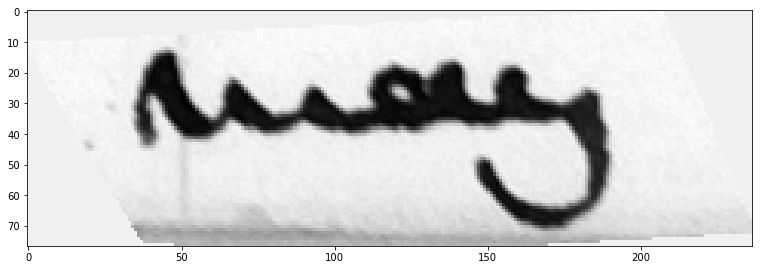

In [9]:
showIt(0, 7)

# Failures

Label:		no evidence is receivable, that was not exhibited 
Prediction:	e aaais , ccewalle , Satwas uatexlitited 


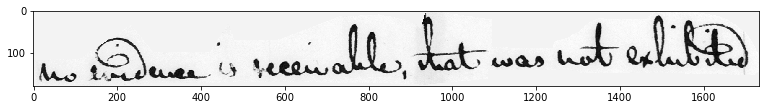

In [10]:
showIt(0,6)